# Implementing SGD On Linear Regression

In [1]:
# importing libraries 
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
boston = load_boston() #loading boston dataset


In [2]:
print(boston.data.shape) #shape of Boston data

(506, 13)


In [3]:
#features of dataset
print(boston.feature_names) 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target) # target values

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR) #describing boston dataset

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head()) # top five features of dataset

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE'] = boston.target #Actual prices of houses

X = bos.drop('PRICE', axis = 1) # loading the dataset except PRICE column in X
Y = bos['PRICE'] #loading the dataset in Y with PRICE column

In [8]:
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.cross_validation import train_test_split
# train and test split of data
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


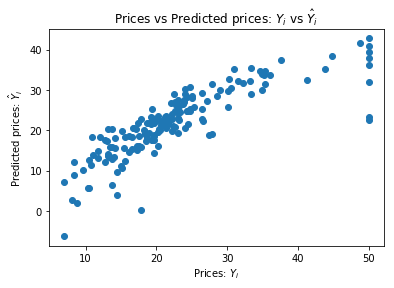

In [9]:
# implementing linear regression with the help of sklearn library 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

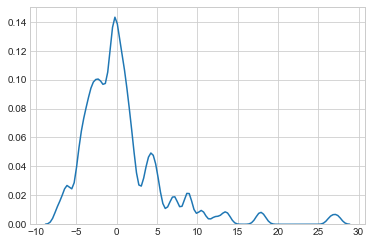

In [10]:
 # actual price or predicted price by model 
delta_y = Y_test - Y_pred; # error of model 

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


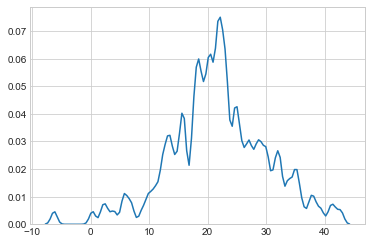

In [11]:
# price predicted by model 
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

# Manual SGD algorithm for linear regression

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_n = sc.fit_transform(X_train)
X_test_n = sc.transform(X_test)

In [41]:
from math import sqrt
import numpy as np 

weight=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
bias= 0
batch_size=8000
learning_rate=0.0001
rmse=[]
N = X_train.shape[0]

for i in range(0,batch_size):
     temp=[]
     y_predict = np.sum(sc.inverse_transform(X_train_n * weight.reshape((1,13))),axis=1) + bias
     cost = sum([data**2 for data in (Y_train-y_predict)]) / N
     rmse.append( sqrt(cost))     
     
     w_gradient = -(2/N) * np.sum((X_train_n.T * np.array(Y_train- y_predict).reshape((1,339))),axis = 1)
     b_gradient = -(2/N) * np.sum((Y_train - y_predict))
        
     weight = weight - (learning_rate * w_gradient)
     bias = bias - (learning_rate * b_gradient)
     

In [42]:
# Weights of manual sgd
manual_sgd_weights = weight

In [43]:
y_predictions = np.sum(sc.inverse_transform(X_test_n * weight.reshape((1,13))),axis=1) + bias

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_predictions)

32.28837924053747

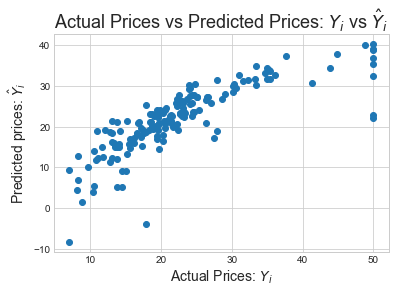

In [45]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Y_test,y_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

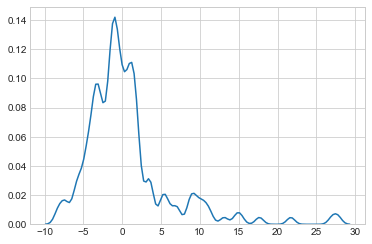

In [46]:
del_y = Y_test - y_predictions;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(del_y), bw=0.5)
plt.show()


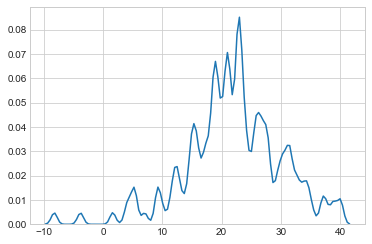

In [47]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_predictions), bw=0.5)
plt.show()

In [48]:
# Calculating accuracy for Implementation of SGD from Scratch
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation of SGD : ",mean_absolute_error(Y_test, y_predictions))
print("Mean Squared Error for Implementation of SGD : ",mean_squared_error(Y_test, y_predictions))
print("Root Mean Squared Error for Implementation of SGD : ",np.sqrt(mean_squared_error(Y_test,y_predictions)))

Mean Absolute Error for Implementation of SGD :  3.655676119884349
Mean Squared Error for Implementation of SGD :  32.28837924053747
Root Mean Squared Error for Implementation of SGD :  5.682286444780611


# Implementing SKLEARN's SGD Regression

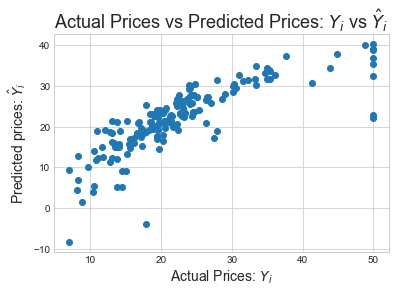

In [49]:
# Implement Sklearn SGD with following parameters as used in manual SGD :

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='none', max_iter=8000, learning_rate='constant' , eta0=0.0004  )
sgd.fit(X_train_n, Y_train)

sklearn_sgd_predictions = sgd.predict(X_test_n)

# Weights of Sklearn's SGD
sklearn_sgd_weights = sgd.coef_ 

plt.scatter(Y_test, y_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

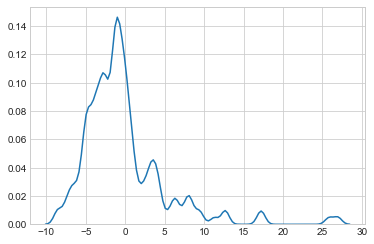

In [50]:
delta_y = Y_test - sklearn_sgd_predictions;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

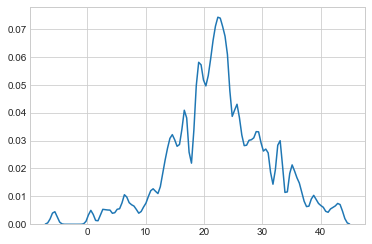

In [51]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(sklearn_sgd_predictions), bw=0.5)
plt.show()

In [52]:
# Calculating accuracy for Implementation of SGD using SKLEARN
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation of SGD using SKLEARN is : ",mean_absolute_error(Y_test,sklearn_sgd_predictions))
print("Mean Squared Error for Implementation of SGD using SKLEARN is : ",mean_squared_error(Y_test, sklearn_sgd_predictions))
print("Root Mean Squared Error for Implementation of SGD using SKLEARN is : ",np.sqrt(mean_squared_error(Y_test,sklearn_sgd_predictions)))

Mean Absolute Error for Implementation of SGD using SKLEARN is :  3.6403499586634163
Mean Squared Error for Implementation of SGD using SKLEARN is :  28.416386550767054
Root Mean Squared Error for Implementation of SGD using SKLEARN is :  5.330702256810734


# Comparing the weight given by manual SGD and sklearn's SGD

In [53]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD",manual_sgd_weights)
ptable.add_column("Weights of Sklearn's SGD",sklearn_sgd_weights)

# Printing the Table
print(ptable)

+-------+-----------------------+--------------------------+
| S.NO. | Weights of Manual SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   1   |  -0.1369832573596221  |   -1.3223138262592047    |
|   2   |  0.05015531289257119  |    0.8794629450339788    |
|   3   | -0.035212858616339764 |   -0.1653520970388861    |
|   4   |   0.5024970946129824  |   0.16599699219913155    |
|   5   |   1.1101473932847272  |    -1.244884440251771    |
|   6   |    4.58114946138253   |      3.010774145189      |
|   7   |   0.0161666624695285  |   -0.34502694783389054   |
|   8   |   -0.539508310951735  |   -2.6546977818261515    |
|   9   |  0.16280232115600024  |    2.8332632895778707    |
|   10  | -0.008227173217055713 |    -2.197397707594946    |
|   11  |  -0.22896285083843335 |    -1.914259267875372    |
|   12  |  0.017935857711960924 |    1.1438301232769796    |
|   13  |  -0.5194701901074604  |    -3.247460818413692    |
+-------+---------------

# Conclusion 

1. In this assignment, we have to implement SGD manually then we have to predict the prices of Boston dataset then we have to compare it with original prices then we have to check out the accuracy of our manually implemented SGD. then i have also implemented Sklearn SGD regression. 
2. Actually in this assignment we have few features of house then we have to implement that type of model which can give us the price of house with the help of features with best accuracy. So i have implemented Manually SGD with linear regression to optimize the problem of best accuracy .
3. For implementing SGD manually i have load the boston data then i split the data in train and test dataset.
4. Then i standarize the data for implementing SGD manually and also calculate  Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) for Manual sgd implementation .
5. After implementing manually SGD i have implemented Sklearn SGD regression to know the difference of weight of both the model.
6. Then i have also plotted scatter plot of Actual Prices vs Predicted Prices for Sklearn's sgd implementation
7. Next, i have calculated Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) for Sklearn's sgd implementation
8. At last i compare the weights produced by both manually implemented SGD and Sklearn's SGD.